In [25]:
import numpy as np
import warnings, os, json, itertools
# warnings.filterwarnings("ignore")

from joblib import Parallel, delayed
from sklearn.preprocessing import PolynomialFeatures

from CombinedDataModule import *
from utils import *
from run_utils import *
from estimators import *

In [ ]:
d = 2                           # 2-dim. covariate vector
n_MC = 50000                    # num. Monte Carlo samples to calculate ground truth mean in the target population
X_range = np.linspace(-1,1,51)  # range of the first covariate
U_range = np.linspace(-1,1,51)  # range of the first covariate

n_rct = 200    # trial sample size
n_tar = 20000   # target sample size
n_obs = 50000   # observational sample size

num_case_per_setting = 40               # num. different ground-truth cases to simulate for EACH GP param. setting
num_runs_per_case = 100                  # num. runs for EACH ground-truth case. a new trial sample is drawn every time.
big_n_rct = num_runs_per_case * n_rct   # sample a big trial once and use its partitions in each run 

poly_degrees = [1,4,7,10]

w_trt_par_list = [{'ls':[1e6,1e6], 'alpha':[0,0]},
                  {'ls':[1e6,1], 'alpha':[0,1]},
                  {'ls':[1e6,1], 'alpha':[0,5]},
                  {'ls':[1e6,1], 'alpha':[0,10]}]

om_A1_par_list = [{'ls':[0.5,0.5], 'alpha':[5,5]},
                  {'ls':[0.2,0.5], 'alpha':[5,5]},
                  {'ls':[0.1,0.5], 'alpha':[5,5]}]

# w_trt_par_list = [{'ls':[1,1e6], 'alpha':[1,0]}]

w_sel_par = {'ls':[1,1e6], 'alpha':[10,0]}
om_A0_par = {'ls':np.array([1,1]), 'alpha':[1,1]}  # unused rn.

num_setting = len(om_A1_par_list) * len(w_trt_par_list)

np.random.seed(42)
case_seeds = np.random.randint(1e6, size=num_case_per_setting)

for ns, (om_A1_par, w_trt_par) in enumerate(itertools.product(om_A1_par_list, w_trt_par_list)):

    gp_setting_json = json.dumps({"w_trt_par": w_trt_par, "om_A1_par": om_A1_par}, indent=4)
    save_dir = f"./results/gp_setting_{ns}"
    os.makedirs(save_dir, exist_ok=True)
    json_path = os.path.join(save_dir, f"gp_setting_{ns}.json")
    with open(json_path, 'w') as json_file:
        json_file.write(gp_setting_json)

    results= \
    Parallel(n_jobs=30)(delayed(sim_one_case) \
            (case_idx, random_seed, save_dir,  om_A0_par, om_A1_par, w_sel_par, w_trt_par, \
            d, big_n_rct, n_tar, n_obs, n_MC, num_runs_per_case, X_range, U_range, poly_degrees) \
                    for case_idx, random_seed in enumerate(case_seeds))
    
    save_setting_stats(results, save_dir, poly_degrees)
    #sim_one_case(1, 1, save_dir,  om_A0_par, om_A1_par, w_sel_par, w_trt_par,d, big_n_rct, n_tar, n_obs, n_MC, num_runs_per_case, X_range, U_range, poly_degrees)

In [55]:
from scipy.special import legendre
polyd = 4
x = np.linspace(-1,1,1001)
poly = PolynomialFeatures(degree=polyd, include_bias=True)
x_poly = poly.fit_transform(x.reshape(-1,1))
legx = x_poly @ np.array(legendre(polyd))[::-1]

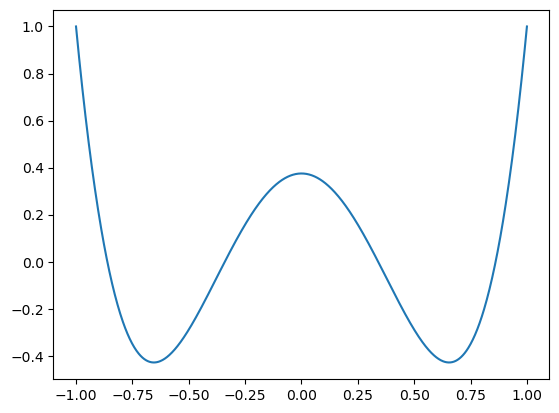

In [56]:
plt.plot(x, legx)

In [41]:
np.array(legendre(3))[::-1]

array([ 0. , -1.5,  0. ,  2.5])

In [12]:
np.linspace(-1,1,51).shape

(51,)

In [57]:
legx.shape

(1001,)

In [60]:
x_poly{;}

(1001, 5)

In [62]:
np.hstack([np.array([1, 2]).reshape(-1,1), np.array([3,4]).reshape(-1,1)])

array([[1, 3],
       [2, 4]])